# PART 1: IMAGE SCRAPING
Goal: To scrape a multitude of images for my dataset. To create a program which can dynamically scrape for images on a multitude of websites.

Created through following and then altering the tutorial found on this site: [LINK TO SITE](https://oxylabs.io/blog/scrape-images-from-website).

Using this method I increased my dataset from 877 images to 2,138. I increased my classification too, to include animals which are similar to ferrets.

Scraped image dataset: [LINK](https://drive.google.com/drive/folders/1NywXFDKv53mN8xn8xNTREswV2PVgVCbw?usp=sharing)

General setup, append and run at beginning of code in order to live scrape (after the %%shell code)!
```
#Installs
!pip install beautifulsoup4 selenium pandas Pillow requests

# Imports
import sys
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import io
from PIL import Image
from pathlib import Path
import hashlib

# Google drive mounting... (make sure to do this after running the %%shell code!!)
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/DMLAP_FINAL')

```



In order to utilise Selenium in google colab the below cells need to be run, this allows it to utilise the chrome driver.
Code from: [link to source](https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com).

In [ ]:
# @title Chrome driver setup
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500

Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

In [41]:
# https://stackoverflow.com/a/76432322
service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless') # when working locally, disabling this allows you to open a browser and see what is happening!
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

In [43]:
# Uncomment below to have a dynamic url option...
siteURL = input("Enter site URL:")
# siteURL = "https://www.istockphoto.com/photos/ferret"
driver.get(siteURL)
results = []
content = driver.page_source
soup = BeautifulSoup(content)
def locate_imgs(classes, location, source):
    for a in soup.findAll(attrs={"class": classes}):
        name = a.find(location)
        if name not in results:
            results.append(name.get(source))

# Uncomment below to have a dynamic div option...
imgClassDiv = input("Enter the image's class div:")
# imgClassDiv = "O7tKXJAzXnksc3Uu4guu" #This works for istockphoto.com
locate_imgs(imgClassDiv,"img", "src")

Enter the image's class div:ABVClgVJTdOPXmIa63fN


In [44]:
# Push image links to CSV file for testing...
df = pd.DataFrame({"links": results})
df.to_csv("links.csv", index=False, encoding="utf-8")

# Uncomment below to have dynamically change the IMG directory.
# IMG_DIR = input("Enter the directory name to store the images: ")
IMG_DIR = "scraped_images"
IMG_DIR = os.path.join("/content/drive/MyDrive/DMLAP_FINAL", IMG_DIR)
os.makedirs(IMG_DIR, exist_ok=True) # checks if directory exists, if not it is created

In [45]:
for b in results:
        image_content = requests.get(b).content
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert("RGB")

        # Saves images in created directory
        file_path = os.path.join(IMG_DIR, hashlib.sha1(image_content).hexdigest()[:10] + ".png")
        image.save(file_path, "PNG", quality=80)
        print("Image " + hashlib.sha1(image_content).hexdigest()[:10] + " sucessfully scraped")

Image 3817523304 sucessfully scraped
Image 5bb2669355 sucessfully scraped
Image cc0b4a0037 sucessfully scraped
Image 3ab8bf090e sucessfully scraped
Image ab19aa175a sucessfully scraped
Image c68c493395 sucessfully scraped
Image 3f576946fc sucessfully scraped
Image ae60d428a9 sucessfully scraped
Image 3fd6dba00a sucessfully scraped
Image c5749c099e sucessfully scraped
Image c63409d270 sucessfully scraped
Image dd4d2f924b sucessfully scraped
Image 27c76f4f1d sucessfully scraped
Image 83446ff238 sucessfully scraped
Image 502e2b1d2e sucessfully scraped
Image 2851b3d32a sucessfully scraped
Image 146b79273d sucessfully scraped
Image 84cedd7f0a sucessfully scraped
Image 28600a80f1 sucessfully scraped
Image 8b3e421719 sucessfully scraped
Image 1ee5d5f233 sucessfully scraped
Image 1d42caa93e sucessfully scraped
Image 92b84f8887 sucessfully scraped
Image ec0b0352a8 sucessfully scraped
Image cdb9431ab3 sucessfully scraped
Image 84e54cc521 sucessfully scraped
Image 1a34f20190 sucessfully scraped
I

# PART 2: DATASET, EDGE DETECTION
Goal: To generate edges for my dataset, using the images I have previously scraped. I want to try with utilising both canny (skimage) and canny (cv2) to see what works the best when training the model...

Full datasets available here:

Skimage: [link](https://drive.google.com/drive/folders/1FbyZK5ufWS4gdkMba__yJy6hjA-HdWCl?usp=sharing)

CV2: [link](https://drive.google.com/drive/folders/14HnVZB1J410N47d0W9PvhlrZnOsYR7_w?usp=sharing)

General setup, taken from the creating your own pix2pix dataset colab from week 6...
```
# Imports
import os
import sys
import glob
import random
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import cv2
from skimage import io
from skimage import filters
from skimage import feature
from tensorflow.keras.preprocessing import image

from IPython.display import clear_output

# Google drive mounting...
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/DMLAP_FINAL')

```



In [ ]:
# DIR handling...
TARGET_DIR = '/content/drive/MyDrive/DMLAP_FINAL/scraped_images'
SOURCE_DIR = None
DATASET_DIR = '/content/drive/MyDrive/DMLAP_FINAL/dataset_2'
os.makedirs(DATASET_DIR, exist_ok=True)

IS_INPUT_PIX_TO_PIX = False
INPUT_OUTPUT_TARGET_INDEX = 1

In [ ]:
def load_image(path):
    size = (256, 256)
    if IS_INPUT_PIX_TO_PIX: # In case we are already loading a pix2pix image
        size = (256, 512)
    img = image.load_img(path, target_size=size)
    img = image.img_to_array(img)
    # If we are loading a pix2pix dataset just extract the target
    if IS_INPUT_PIX_TO_PIX:
        if INPUT_OUTPUT_TARGET_INDEX == 0:
            img = img[:,:size[0],:]
        else:
            img = img[:,size[0]:,:]
    return img.astype(np.uint8)

def load_images_in_path(path, shuffle=False, limit=0):
    fnames = glob.glob(os.path.join(path, "*"))
    print(f"Found {len(fnames)} files in '{path}'")
    if limit > 0:
        fnames = fnames[:limit]
        print(f"Limiting number of files to {limit}")
    for f in fnames:
        yield load_image(f) # See this: https://realpython.com/introduction-to-python-generators/

Found 2140 files in '/content/drive/MyDrive/DMLAP_FINAL/scraped_images'


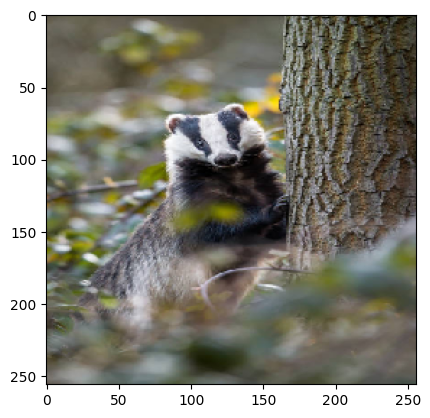

In [ ]:
if SOURCE_DIR:
    source_loader = iter(load_images_in_path(SOURCE_DIR))
    plt.imshow(next(source_loader))
    plt.show()

target_loader = iter(load_images_in_path(TARGET_DIR)) # create an iterator
plt.imshow(next(target_loader))
plt.show()

Found 2138 files in '/content/drive/MyDrive/DMLAP_FINAL/scraped_images'


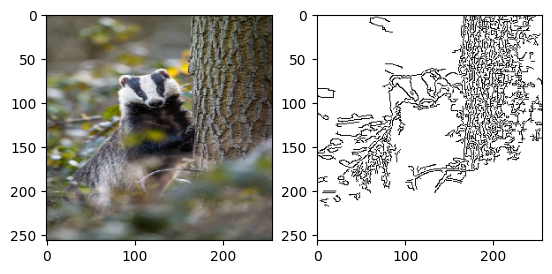

In [ ]:
def apply_canny_cv2(img, thresh1=100, thresh2=250, invert=True):
    grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(grey_img, thresh1, thresh2)
    if invert:
        edges = cv2.bitwise_not(edges)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

def apply_canny_skimage(img, sigma= 1.7, invert=True):
    grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = (feature.canny(grey_img, sigma=sigma)*255).astype(np.uint8)
    if invert:
        edges = cv2.bitwise_not(edges)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

def load_source(img, img_source_iterator):
    return next(img_source_iterator)

image_transformation = apply_canny_cv2
# image_transformation = apply_canny_skimage

img = next(load_images_in_path(TARGET_DIR))
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(image_transformation(img))
plt.show()

In [ ]:
OUTPUT_TARGET_INDEX = 1 # 0: [target, source], 1: [source, target]

NUM_IMAGES = 0 # if you have a lot of images and want to parse only a fraction

img_loader = iter(load_images_in_path(TARGET_DIR, limit=NUM_IMAGES))

def combine_images(source, target):
    if OUTPUT_TARGET_INDEX == 1:
        combined = np.hstack([source, target])
    else:
        combined = np.hstack([target, source])
    return combined

if SOURCE_DIR:
    # CASE 1: we have source images, we want to combine them
    # create a source image iterator
    source_loader = iter(load_images_in_path(SOURCE_DIR, limit=num_images))
    # loop over both source and target and save the combine images
    for i, (source, target) in enumerate(zip(source_loader, img_loader)):
        clear_output(wait=True)
        print(f"Processing image {i}")
        # IDEA: you could also apply additional processing to either your
        # source or target here
        combined = combine_images(source, target)
        io.imsave(os.path.join(DATASET_DIR, f"{i+1}.png"), combined)
else:
    # CASE 2: we only have targets, we create the sources and combine them
    for i, target in enumerate(img_loader):
        clear_output(wait=True)
        print(f"Processing image {i}")

        source = image_transformation(target)
        if source is None:
            print(f"Failed to transform image {i+1}")
            continue

        combined = combine_images(source, target)
        io.imsave(os.path.join(DATASET_DIR, f"{i+1}.png"), combined)

Processing image 2137


# PART 3: MODEL TRAINING, COMPARING AND VERSIONS...
Goal: To train my models, then compare which one is more effective!
Below you can utilise a basic setup to load the models which I had trained so far...

Full model folders:

Old model: [LINK](https://drive.google.com/drive/folders/1M8sr_ZQMAOXGsNlDPL_1Di8rTM4wj4Ln?usp=sharing)

Skimage: [LINK](https://drive.google.com/drive/folders/1-29jeAWA9x7IlNZO3VqhkWbC00krwhnD?usp=sharing)

CV2 [LINK](https://drive.google.com/drive/folders/10mOvB01dxibrvAUZ05HqSIfWLIM1Cu3O?usp=sharing)

Final model [LINK](https://drive.google.com/drive/folders/1doIUtDre1hNOmDXLUBK17FJKZ8Td8ic3?usp=sharing)

General setup, taken from the creating your own pix2pix dataset colab from week 6...
```
# Imports
import tensorflow as tf
import os
import sys
import glob
import random
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import cv2
from skimage import io
from skimage import filters
from skimage import feature
from tensorflow.keras.preprocessing import image

from IPython.display import clear_output

# Google drive mounting...
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/DMLAP_FINAL')

```



In [8]:
# Original edges2ferrets model from wk 6
# model_path = '/content/drive/MyDrive/DMLAP_FINAL/models/edges2ferrets_v1/e39000_generator.hd5'

# Skimage edges model
# model_path = '/content/drive/MyDrive/DMLAP_FINAL/models/skimage/FINAL_SKIMAGE.hd5'

# CV2 edges model
# model_path = '/content/drive/MyDrive/DMLAP_FINAL/models/cv2/FINAL_CV2.hd5'

# Final edges2ferrets model!
model_path = '/content/drive/MyDrive/DMLAP_FINAL/models/edges2ferrets_ver2.2/FINAL_EDGES2FERRETS.hd5'

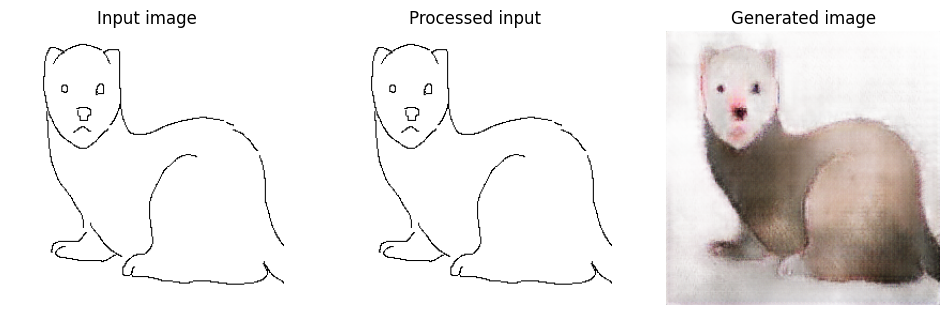

In [10]:
generator = tf.keras.models.load_model(model_path)
def transform_image(img):
    img = (img - 127.5) / 127.5
    result = generator(np.expand_dims(img, 0), training=True)[0].numpy()
    return result * 0.5 + 0.5

def apply_bw_cv2(img, thresh1=160, thresh2=250):
    grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.merge([grey_img, grey_img, grey_img])

img = io.imread('/content/drive/MyDrive/DMLAP_FINAL/ferret50_lines/1.png') # Sample sketches from 1-51, just change the name to the number
landmark_img = apply_bw_cv2(img)

plt.figure(figsize=(12,12))
plt.subplot(1, 3, 1)
plt.title('Input image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Processed input')
plt.imshow(landmark_img)
plt.axis('off')
plt.subplot(1, 3, 3)
gen_img = transform_image(landmark_img)
plt.title('Generated image')
plt.imshow(gen_img)
plt.axis('off')
plt.show()

After comparing the models (all trained for around 40,000 epochs) it was clear that due to the size of the dataset I would need to train for a significantly longer time to get the results I wanted.

At this point however, when comparing the models so far, i felt that the skimage generated edges worked slightly better than those generated with the CV2 edges.

As such I decided to continue with the skimage edges for my final refined model.

# PART 4: REFINING DATASET...
Goal: I was concerned that by including lots of different animals within my dataset I would confuse the model slightlty, As such I decided to refine my dataset for better outputs - namely to just include ferrets and other weasel type animals (stoats, pine martens, minks etc) in order to keep the overall shape of the animals more consistent.

For this I needed to accumulate more images of ferrets. As the image scraping is yielding a finite number of resources, I will create a program to screenshot from an inputted clip and save these. This should be an efficient way to gain a large number of ferret images...

Youtube videos used: [VID1](https://www.youtube.com/watch?v=ZBoz2mitPiY), [VID 2](https://www.youtube.com/watch?v=5x-jhFVYlsQ), [VID 3](https://www.youtube.com/watch?v=aF399DNTMlo), [VID 4](https://www.youtube.com/watch?v=dgQ8Ef7EUC4), [VID 5](https://www.youtube.com/watch?v=T8CPYNngSXE), [VID 6](https://www.youtube.com/watch?v=EcX8fdxtNqM), [VID 7](https://www.youtube.com/watch?v=XEAjKTO_o-k), [VID 8](https://www.youtube.com/watch?v=jiUpv4JkYx0), [VID 9](https://www.youtube.com/watch?v=Mnx4tCIxOqY)

Final dataset: [LINK](https://drive.google.com/drive/folders/1Cow35EAOzQSIBFOje0FtgvqvwRGSyx6v?usp=sharing)

Imports and setup

```
# Imports
import cv2
from PIL import Image
import time
import sys
import os

# Google drive mounting...
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/DMLAP_FINAL')
```



In [30]:
def video_slicer(video, output_folder, interval_seconds):
    cap = cv2.VideoCapture(video)
    frame_rate = cap.get(cv2.CAP_PROP_FPS)

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Create output folder if not exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    screenshot_number = 729  # Counter for screenshots

    try:
        while True:
            ret, frame = cap.read()

            if not ret:
                break

            # Capture screenshot every interval_seconds
            if int(cap.get(cv2.CAP_PROP_POS_FRAMES)) % int(frame_rate * interval_seconds) == 0:
                screenshot_path = os.path.join(output_folder, f'screenshot_{screenshot_number}.png')
                cv2.imwrite(screenshot_path, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                print(f'Screenshot {screenshot_number} saved!')
                screenshot_number += 1

    finally:
        cap.release()

if __name__ == "__main__":
    video = "/content/drive/MyDrive/DMLAP_FINAL/videos/ferretVid9.mp4"
    output_folder = "scraped_images_vid"
    interval_seconds = 1  # Capture a screenshot every 5 seconds


In [31]:
video_slicer(video, output_folder, interval_seconds)

Screenshot 729 saved!
Screenshot 730 saved!
Screenshot 731 saved!
Screenshot 732 saved!
Screenshot 733 saved!
Screenshot 734 saved!
Screenshot 735 saved!
Screenshot 736 saved!
Screenshot 737 saved!
Screenshot 738 saved!
Screenshot 739 saved!
Screenshot 740 saved!
Screenshot 741 saved!
Screenshot 742 saved!
Screenshot 743 saved!
Screenshot 744 saved!
Screenshot 745 saved!
Screenshot 746 saved!
Screenshot 747 saved!
Screenshot 748 saved!
Screenshot 749 saved!
Screenshot 750 saved!
Screenshot 751 saved!
Screenshot 752 saved!
Screenshot 753 saved!
Screenshot 754 saved!
Screenshot 755 saved!
Screenshot 756 saved!
Screenshot 757 saved!
Screenshot 758 saved!
Screenshot 759 saved!
Screenshot 760 saved!
Screenshot 761 saved!
Screenshot 762 saved!
Screenshot 763 saved!
Screenshot 764 saved!
Screenshot 765 saved!
Screenshot 766 saved!


# PART 5: GRADIO APP IMPLEMENTATION
Goal: To utilise my trained model for a gradio app! Where the user can input an image and have a ferret generated out!

I then uploaded this to my huggingface account to keep the model running in an external environment! This way I could then embed/utilise my model at a later date.

Link to live app: [LINK](https://huggingface.co/spaces/lunalade/edges2Ferrets)



```
# Installs
!pip install gradio

# Imports
import tensorflow as tf
import gradio as gr
import cv2
import numpy as np
from PIL import Image
import sys
import os
from skimage import feature

# Google drive mounting...
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/DMLAP_FINAL')
```



In [ ]:
# @title Model loading check...
model_path = '/content/drive/MyDrive/DMLAP_FINAL/models/edges2ferrets_ver2.2/e299999_generator.h5'
try:
    # Attempt to load the model
    edges2ferrets_model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading the model:", e)
    raise

# Loads model summary...
edges2ferrets_model.summary()


In [13]:
# Model loading
edges2ferrets = '/content/drive/MyDrive/DMLAP_FINAL/models/edges2ferrets_ver2.2/FINAL_EDGES2FERRETS.hd5'
ferretMaker = tf.keras.models.load_model(edges2ferrets)

def transform_image(img, input_type):
    sigma = 1.7
    if input_type == "Photo":
        # Resize the input
        img = cv2.resize(img, (256, 256))

        # Convert the input photo to grayscale
        grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Apply skimage transformation to input photo
        edges = (feature.canny(grey_img, sigma=sigma) * 255).astype(np.uint8)
        processed_input = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

    elif input_type == "Drawing":
        # Resize the input
        img = cv2.resize(img, (256, 256))

        # Applies CV2 transformation to input drawing
        grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        processed_input = cv2.merge([grey_img, grey_img, grey_img])
    else:
        raise ValueError("Invalid input_type. Choose 'photo' or 'drawing'.")

    # Ferret-ing the input!
    processed_input = (processed_input - 127.5) / 127.5
    result = ferretMaker(np.expand_dims(processed_input, 0), training=True)[0].numpy()
    generated_ferret = (result * 0.5 + 0.5) * 255.0

    return generated_ferret.astype(np.uint8)

# Different canny logic is applied depending on the input the user selects. With photo, skimage is applied, and with drawing cv2 bw is applied.
iface = gr.Interface(
    fn=transform_image,
    inputs=[gr.Image(type="numpy", image_mode="RGB"), gr.Radio(["Photo", "Drawing"], label="Select Input Type")],
    outputs=gr.Image(type="numpy", image_mode="RGB"),
    live=True,
    title="Edges2Ferrets generation!",
    description="Choose between photo or drawing input to create a ferret!",
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a7009a0a02aceab74b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# PART 6: JS SITE TO HOLD APP
Goal: To implement my HF uploaded app within an app, this allows me more customisation to create a ferret generating environment!

Link to entire folder: [LINK](https://drive.google.com/drive/folders/1CPJ4phXsQyP-MJKgwsGlgRoa5CVnU4hh?usp=sharing)